<a href="https://colab.research.google.com/github/JesusDBS/learning-notes/blob/main/notebooks/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

In [ ]:
#Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.11.0


## Creating data to view and fit

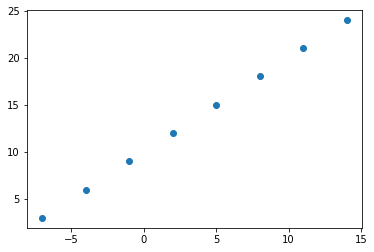

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.10, 21.0, 24.0])

#Vizualize it:
plt.scatter(X, y)

In [ ]:
# Try to figure it out what kind of relation is between varibles
y == X + 10

array([ True,  True,  True,  True,  True, False,  True,  True])

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X[0], y[0], X[1], y[1]

(-7.0, 3.0, -4.0, 6.0)

In [ ]:
# Turn NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3. ,  6. ,  9. , 12. , 15. , 18.1, 21. , 24. ], dtype=float32)>)

from keras.api._v2.keras import Model
## Steps in modeling with TensorFlow

1. **Creating a model** - define the input and the output layers, as well as the hidden layers of a deep learning Model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong is) and the optimazer (tells our model how to improve the patterns its learning) and evalution metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [ ]:
tf.random.set_seed(42)

# 1.Create a models using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model.compile(loss=tf.keras.losses.mae, #mean aboslute error
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent
              metrics=["mae"])

# 3.Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 21.0385 - mae: 21.0385
Epoch 2/5
1/1 [==============================] - 0s 42ms/step - loss: 19.9171 - mae: 19.9171
Epoch 3/5
1/1 [==============================] - 0s 30ms/step - loss: 19.1200 - mae: 19.1200
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 18.3989 - mae: 18.3989
Epoch 5/5
1/1 [==============================] - 0s 17ms/step - loss: 17.7454 - mae: 17.7454


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3. ,  6. ,  9. , 12. , 15. , 18.1, 21. , 24. ], dtype=float32)>)

In [ ]:
# Try and make a prediction with the model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 1s 607ms/step


array([[-14.344521]], dtype=float32)

In [ ]:
y_pred + 7.4489

array([[-6.8956203]], dtype=float32)

### Improveing our model.

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perphas the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Lets rebuild our model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# This time we train for longer time
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 7.5125 - mae: 7.5125
Epoch 2/100
1/1 [==============================] - 0s 41ms/step - loss: 7.5069 - mae: 7.5069
Epoch 3/100
1/1 [==============================] - 0s 32ms/step - loss: 7.5013 - mae: 7.5013
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 7.4956 - mae: 7.4956
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 7.4900 - mae: 7.4900
Epoch 6/100
1/1 [==============================] - 0s 28ms/step - loss: 7.4844 - mae: 7.4844
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 7.4788 - mae: 7.4788
Epoch 8/100
1/1 [==============================] - 0s 31ms/step - loss: 7.4731 - mae: 7.4731
Epoch 9/100
1/1 [==============================] - 0s 28ms/step - loss: 7.4675 - mae: 7.4675
Epoch 10/100
1/1 [==============================] - 0s 43ms/step - loss: 7.4619 - mae: 7.4619
Epoch 11/100
1/1 [==============================] - 0s 39ms/step - loss

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3. ,  6. ,  9. , 12. , 15. , 18.1, 21. , 24. ], dtype=float32)>)

In [ ]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 275ms/step


array([[30.071096]], dtype=float32)

In [ ]:
# Lets rebuild our model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# This time we train for longer time
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 16.7783 - mae: 16.7783
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 16.7723 - mae: 16.7723
Epoch 3/100
1/1 [==============================] - 0s 39ms/step - loss: 16.7663 - mae: 16.7663
Epoch 4/100
1/1 [==============================] - 0s 31ms/step - loss: 16.7603 - mae: 16.7603
Epoch 5/100
1/1 [==============================] - 0s 24ms/step - loss: 16.7543 - mae: 16.7543
Epoch 6/100
1/1 [==============================] - 0s 29ms/step - loss: 16.7483 - mae: 16.7483
Epoch 7/100
1/1 [==============================] - 0s 44ms/step - loss: 16.7423 - mae: 16.7423
Epoch 8/100
1/1 [==============================] - 0s 56ms/step - loss: 16.7363 - mae: 16.7363
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 16.7303 - mae: 16.7303
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 16.7243 - mae: 16.7243
Epoch 11/100
1/1 [==============================] -

In [ ]:
#Adding more hidden layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 765ms/step - loss: 14.1278 - mae: 14.1278
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 13.4763 - mae: 13.4763
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.8265 - mae: 12.8265
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 12.1773 - mae: 12.1773
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 11.5274 - mae: 11.5274
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 10.8747 - mae: 10.8747
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.2164 - mae: 10.2164
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 9.5497 - mae: 9.5497
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 8.8715 - mae: 8.8715
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 8.1785 - mae: 8.1785
Epoch 11/100
1/1 [==============================] - 0s

In [ ]:
# Learning rate is one of the most important hyper-parameters you can change to improve your model
y_predict = model.predict([17.0])
y_predict

1/1 [==============================] - 0s 84ms/step


array([[27.431755]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go throuhg when building neural networks is:

```
Buld a model --> fit it --> evaluate it --> tweak a model --> fit it --> evaluate it --> tweak a model ...
```

When it comes to evaluation... there are 3 words you should memorize:
> "visualize, visualize, visulize"

It´s a good idea to visualize:
* The data - what data are we working with?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up agains the ground truth (the original labels)



In [ ]:
#Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

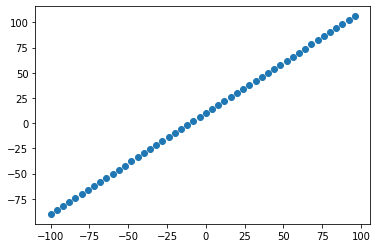

In [ ]:
plt.scatter(X, y)

### The three sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the data you have available.
* **Validation set** - the model gets turned on this data, which is typically 10-15% of the data available.
*  **Test set** - the model gets evaluated on this data to test what is has to learned, this is typically 10-15% of total data available.

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split data into train and test sets
X_train = X[:40] #fist 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] #last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and tests sets... lets visualize it again

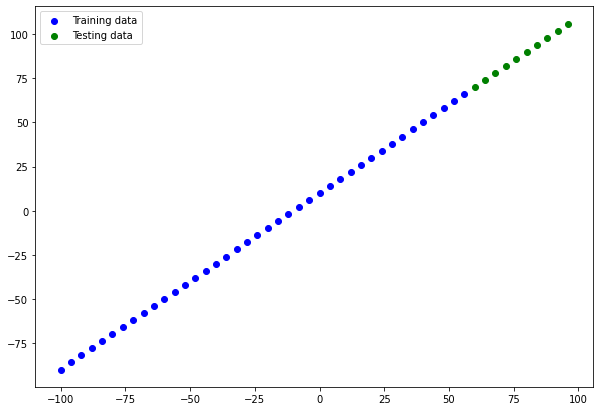

In [ ]:
plt.figure(figsize=(10, 7))

# Plot training data in blue

plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visulizing the model

In [ ]:
# model.summary()

In [ ]:
# Create a model using input_shape

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of paramameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

In [ ]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


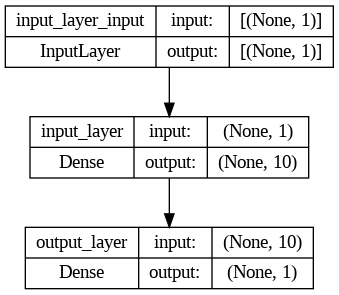

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's prdictions

To visualize predictions, it's a good idea to plot them aginst the ground truth labels.

In [ ]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 65ms/step


array([[ 76.36987 ],
       [ 81.34605 ],
       [ 86.32223 ],
       [ 91.2984  ],
       [ 96.27459 ],
       [101.250755],
       [106.226944],
       [111.203125],
       [116.1793  ],
       [121.155464]], dtype=float32)

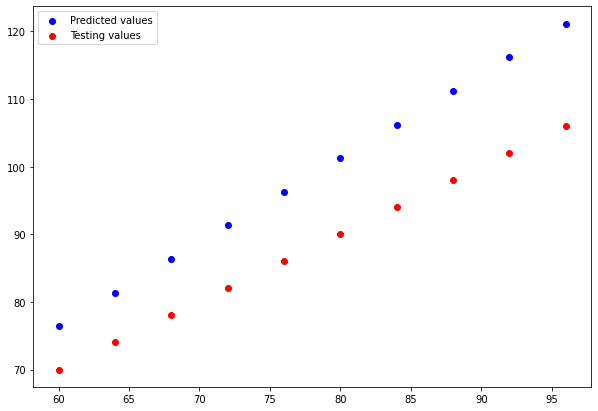

In [ ]:
plt.figure(figsize=(10, 7))

plt.scatter(X_test, y_pred, c="b", label="Predicted values")
plt.scatter(X_test, y_test, c="r", label="Testing values")
plt.legend();


### Evaluating our model's predictions with regression evaluations metrics

Depending on the problem you're working on, thee will be different evaluations metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:

* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 208ms/step - loss: 10.7627 - mae: 10.7627


[10.762670516967773, 10.762670516967773]

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.36987 ,  81.34605 ,  86.32223 ,  91.2984  ,  96.27459 ,
       101.250755, 106.226944, 111.203125, 116.1793  , 121.155464],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.keras.losses.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.762672>

In [ ]:
# Calculate the mean square error
mse = tf.keras.losses.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=123.69673>

### Running experiments to improve our models

1. Get more data
2. Make your model more complex (add more layersm hidden units in each layer)
3. Train for longer - give more epochs

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build model_1**

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 14ms/step - loss: 23.4778 - mae: 23.4778
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 10.7243 - mae: 10.7243
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 16.5212 - mae: 16.5212
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 8.8347 - mae: 8.8347
Epoch 5/100
2/2 [==============================] - 0s 18ms/step - loss: 10.7089 - mae: 10.7089
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.9070 - mae: 9.9070
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.9692 - mae: 8.9692
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0807 - mae: 9.0807
Epoch 9/100
2/2 [==============================] - 0s 15ms/step - loss: 19.7446 - mae: 19.7446
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.6687 - mae: 10.6687
Epoch 11/100
2/2 [==============================] - 0s 13ms/st

In [ ]:
def plot_predict(X, y, y_p):
  plt.figure(figsize=(10, 7))

  plt.scatter(X, y_p, c="b", label="Predicted values")
  plt.scatter(X, y, c="r", label="Testing values")
  plt.legend();

def calculate_mae(y, y_p):
  mae = tf.keras.losses.mean_absolute_error(y, tf.squeeze(y_p))
  print(f'This is the mean absolute error of the model: {mae.numpy()}')
  return mae

def calculate_mse(y, y_p):
  mse = tf.keras.losses.mean_squared_error(y, tf.squeeze(y_p))
  print(f'This is the mean square error of the model: {mse.numpy()}')
  return mse

In [ ]:
y_preds_1 = model_1.predict(X_test)
y_preds_1

1/1 [==============================] - 0s 306ms/step


array([[51.628506],
       [54.98295 ],
       [58.33739 ],
       [61.691833],
       [65.04628 ],
       [68.40072 ],
       [71.75516 ],
       [75.109604],
       [78.46404 ],
       [81.81848 ]], dtype=float32)

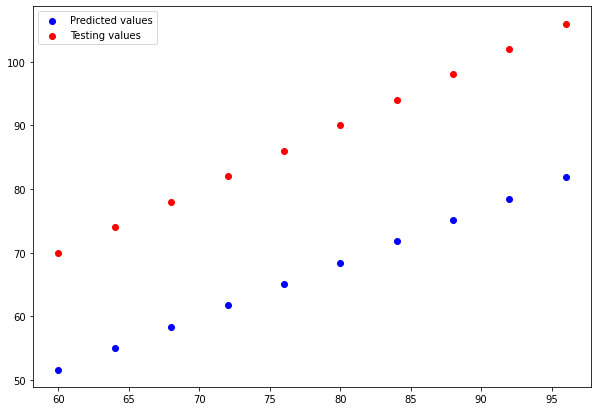

In [ ]:
plot_predict(X_test, y_test, y_preds_1)

In [ ]:
mae_1 = calculate_mae(y_test, y_preds_1)
mse_1 = calculate_mse(y_test, y_preds_1)

This is the mean absolute error of the model: 21.276504516601562
This is the mean square error of the model: 456.12774658203125


**Build `model_2`**

* 2 dense layers, trained for 100 epochs


In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 16ms/step - loss: 36.8671 - mse: 1881.3750
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 29.1779 - mse: 1114.5355
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 34.0891 - mse: 1750.7367
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 28.2840 - mse: 1178.1394
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 15.3726 - mse: 302.5157
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 12.2049 - mse: 184.7824
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 11.4996 - mse: 160.9488
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2155 - mse: 176.2678
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 41.8943 - mse: 2799.5796
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 29.1050 - mse: 1197.7916
Epoch 11/100
2/2 [==================

In [ ]:
y_p_2 = model_2.predict(X_test)
y_p_2

1/1 [==============================] - 0s 65ms/step


array([[ 78.30061 ],
       [ 83.40437 ],
       [ 88.508125],
       [ 93.61188 ],
       [ 98.71562 ],
       [103.819374],
       [108.923134],
       [114.02689 ],
       [119.130646],
       [124.234406]], dtype=float32)

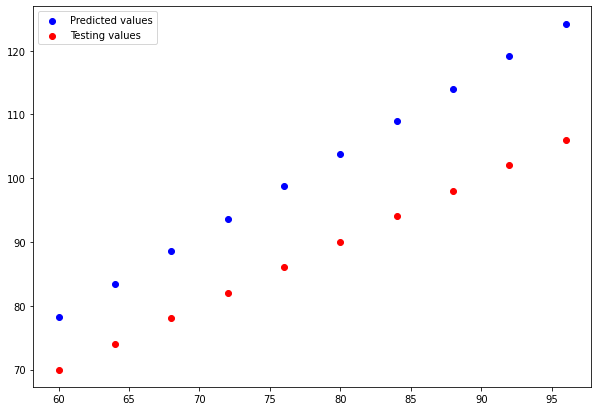

In [ ]:
plot_predict(X_test, y_test, y_p_2)

In [ ]:
mae_2 = calculate_mae(y_test, y_p_2)
mse_2 = calculate_mse(y_test, y_p_2)

This is the mean absolute error of the model: 13.26750659942627
This is the mean square error of the model: 186.07748413085938


**Build `model_3`**

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 13ms/step - loss: 72.1567 - mae: 72.1567
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 25.6869 - mae: 25.6869
Epoch 3/500
2/2 [==============================] - 0s 10ms/step - loss: 18.6673 - mae: 18.6673
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 13.6176 - mae: 13.6176
Epoch 5/500
2/2 [==============================] - 0s 16ms/step - loss: 15.0850 - mae: 15.0850
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 11.9975 - mae: 11.9975
Epoch 7/500
2/2 [==============================] - 0s 12ms/step - loss: 11.3210 - mae: 11.3210
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.1664 - mae: 11.1664
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 41.1477 - mae: 41.1477
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 28.4524 - mae: 28.4524
Epoch 11/500
2/2 [==============================] - 0s 

In [ ]:
y_p_3 = model_3.predict(X_test)
y_p_3

1/1 [==============================] - 0s 115ms/step


array([[16.872269],
       [17.68576 ],
       [18.499254],
       [19.312746],
       [20.126238],
       [20.939732],
       [21.753225],
       [22.566717],
       [23.38021 ],
       [24.1937  ]], dtype=float32)

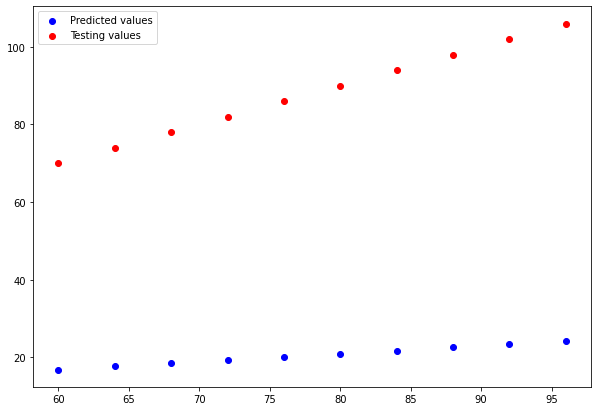

In [ ]:
plot_predict(X_test, y_test, y_p_3)

In [ ]:
mae_3 = calculate_mae(y_test, y_p_3)
mse_3 = calculate_mse(y_test, y_p_3)

This is the mean absolute error of the model: 67.4670181274414
This is the mean square error of the model: 4635.5673828125


**Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                  ["model_2", mae_2.numpy(), mse_2.numpy()],
                  ["model_3", mae_3.numpy(), mse_3.numpy()]]
columns = ["model", "mae", "mse"]
all_results = pd.DataFrame(model_results, columns=columns)
all_results

,model,mae,mse
0,model_1,21.276505,456.127747
1,model_2,13.267507,186.077484
2,model_3,67.467018,4635.567383


Looks like `model_2` performed the best...

In [ ]:
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                20        
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what work. Remember the machine learning practicioner's motto: "experiment", "experiment", "experiment".

### Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us:

* TensorBoard: A component of the TensorFlow library to help track modelling experiments.
* Weights & Biases: A tool for tracking all of kind machine learning experiments.

## Saving our models

Saving our models allow us to use them outside of Google Colab, such as in a Web App.
There are two main formats we can save our models:
1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model
model_2.save("best_model_SaveModel_format")

In [ ]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

### Loading in a saved model

In [ ]:
loaded_SaveModel_format = tf.keras.models.load_model('best_model_SaveModel_format')

In [ ]:
loaded_SaveModel_format.predict(X_test)

1/1 [==============================] - 0s 327ms/step


array([[ 78.30061 ],
       [ 83.40437 ],
       [ 88.508125],
       [ 93.61188 ],
       [ 98.71562 ],
       [103.819374],
       [108.923134],
       [114.02689 ],
       [119.130646],
       [124.234406]], dtype=float32)

In [ ]:
loaded_SaveModel_format.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                20        
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loaded_SaveModel_format.predict(X_test) == model_2.predict(X_test)

1/1 [==============================] - 0s 68ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
loaded_HDF5_format = tf.keras.models.load_model("best_model_HDF5_format.h5")

In [ ]:
loaded_HDF5_format(X_test)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 78.30061 ],
       [ 83.40437 ],
       [ 88.508125],
       [ 93.61188 ],
       [ 98.71562 ],
       [103.819374],
       [108.923134],
       [114.02689 ],
       [119.130646],
       [124.234406]], dtype=float32)>

In [ ]:
model_2.predict(X_test) == loaded_HDF5_format(X_test)

1/1 [==============================] - 0s 23ms/step


<tf.Tensor: shape=(10, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])>

## Large example of a regression problem

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#One hot econding
df = pd.get_dummies(df, prefix=["sex_encoded", "smoker_encoded", "region_encoded"])

In [ ]:
df.head()

,age,bmi,children,charges,sex_encoded_female,sex_encoded_male,smoker_encoded_no,smoker_encoded_yes,region_encoded_northeast,region_encoded_northwest,region_encoded_southeast,region_encoded_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (fetures and labels)
X = df.drop("charges", axis=1)
y = df["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_encoded_female,sex_encoded_male,smoker_encoded_no,smoker_encoded_yes,region_encoded_northeast,region_encoded_northwest,region_encoded_southeast,region_encoded_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.view()

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Shape of train data:")
print(X_train.shape, y_test.shape, "\n")
print("Shape of test data:")
X_test.shape, y_test.shape

Shape of train data:
(1070, 11) (268,) 

Shape of test data:


((268, 11), (268,))

In [ ]:
X_train.head()

,age,bmi,children,sex_encoded_female,sex_encoded_male,smoker_encoded_no,smoker_encoded_yes,region_encoded_northeast,region_encoded_northwest,region_encoded_southeast,region_encoded_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


In [ ]:
tf.random.set_seed(42)

insaurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insaurance_model.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.SGD(),
                         metrics=["mae"])

insaurance_model.fit(X_test, y_test, epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 4ms/step - loss: 12014.7256 - mae: 12014.7256
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 7506.5347 - mae: 7506.5342
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 7722.7808 - mae: 7722.7808
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 7191.2651 - mae: 7191.2651
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 7439.4219 - mae: 7439.4219
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 7243.0034 - mae: 7243.0034
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 7844.1509 - mae: 7844.1509
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: 7593.1948 - mae: 7593.1948
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 7547.5918 - mae: 7547.5918
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 7265.2036 - mae: 7265.2036
Epoch 11/100
9/9 

In [ ]:
insaurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7543.6045 - mae: 7543.6045


[7543.6044921875, 7543.6044921875]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

In [ ]:
y_predict = insaurance_model.predict(X_test)
y_predict

9/9 [==============================] - 0s 8ms/step


array([[ 7297.076  ],
       [ 4672.853  ],
       [11345.307  ],
       [ 7604.0347 ],
       [ 1551.1945 ],
       [ 3373.558  ],
       [ 1730.3987 ],
       [ 9917.364  ],
       [ 4080.7114 ],
       [ 7990.7095 ],
       [ 4913.55   ],
       [ 6009.15   ],
       [ 3452.3096 ],
       [ 6860.072  ],
       [ 9448.399  ],
       [ 7195.75   ],
       [ 6717.958  ],
       [ 7200.3145 ],
       [ 7134.7407 ],
       [ 6952.053  ],
       [ 3655.134  ],
       [ 6251.53   ],
       [ 1105.6539 ],
       [  983.5298 ],
       [ 8214.626  ],
       [ 8260.911  ],
       [ 9266.528  ],
       [ 3216.4395 ],
       [ 7598.901  ],
       [  985.50494],
       [ 6166.978  ],
       [ 8918.4375 ],
       [ 1194.23   ],
       [ 4698.9688 ],
       [ 2755.295  ],
       [ 5827.106  ],
       [ 1971.8824 ],
       [ 6288.0005 ],
       [ 9212.764  ],
       [ 5047.9937 ],
       [ 1983.4907 ],
       [ 1819.6265 ],
       [ 8524.951  ],
       [ 9889.486  ],
       [ 3969.5833 ],
       [ 9

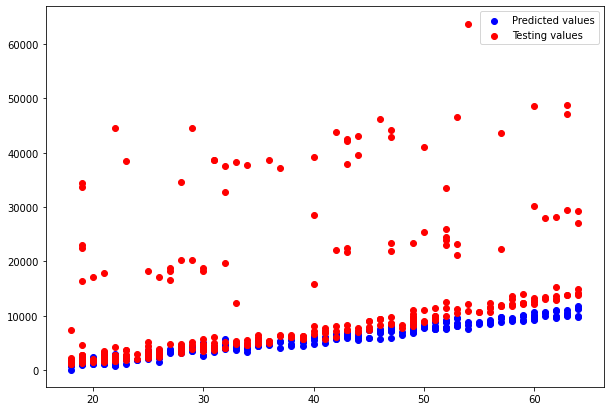

In [ ]:
plot_predict(X_test["age"], y_test, y_predict)

Right now it looks like our model isn't performing too well... Let's try and improve it!
1. Add an extra layer with hidden units and use Adam optimizer
2. Train for longer, maybe 200 epochs


In [ ]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 13287.8613 - mae: 13287.8613
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13115.6523 - mae: 13115.6523
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 12747.3643 - mae: 12747.3643
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12025.7295 - mae: 12025.7295
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 10836.1514 - mae: 10836.1514
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 9351.9854 - mae: 9351.9854
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 8047.7104 - mae: 8047.7104
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 7489.2314 - mae: 7489.2314
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7406.7305 - mae: 7406.7305
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 7386.5840 - mae:

In [ ]:
insurance_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               1200      
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4796.6162 - mae: 4796.6162


[4796.6162109375, 4796.6162109375]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

In [ ]:
y_predict_2 = insurance_model_2.predict(X_test)

9/9 [==============================] - 0s 7ms/step


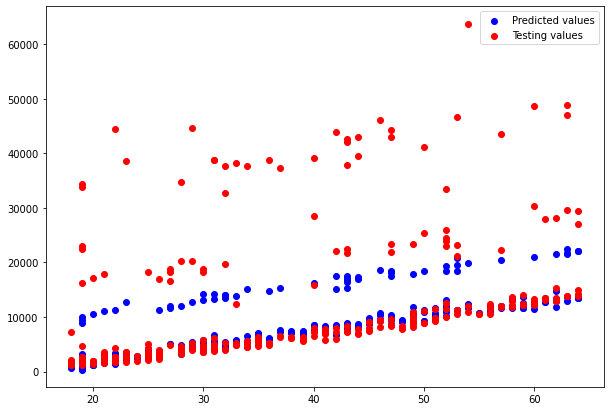

In [ ]:
plot_predict(X_test["age"], y_test, y_predict_2)

In [ ]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 4s 7ms/step - loss: 13304.0605 - mae: 13304.0605
Epoch 2/200
34/34 [==============================] - 0s 11ms/step - loss: 13166.1123 - mae: 13166.1123
Epoch 3/200
34/34 [==============================] - 0s 10ms/step - loss: 12877.4521 - mae: 12877.4521
Epoch 4/200
34/34 [==============================] - 0s 8ms/step - loss: 12298.4941 - mae: 12298.4941
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 11284.7012 - mae: 11284.7012
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9868.2422 - mae: 9868.2422
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8432.4678 - mae: 8432.4678
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7595.3320 - mae: 7595.3320
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7421.1943 - mae: 7421.1943
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7397.1914 - ma

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

In [ ]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3503.9993 - mae: 3503.9993


[3503.999267578125, 3503.999267578125]

In [ ]:
y_predict_3 = insurance_model_3.predict(X_test)

9/9 [==============================] - 0s 2ms/step


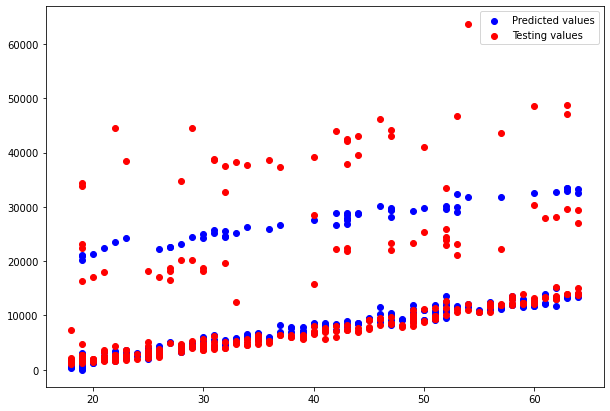

In [ ]:
plot_predict(X_test["age"], y_test, y_predict_3)

Text(0.5, 0, 'epochs')

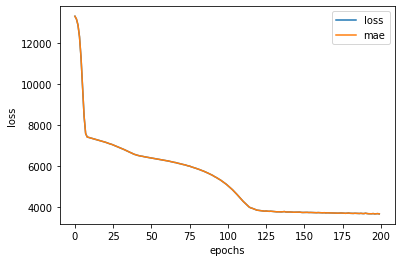

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization and standariztion)

In term of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [ ]:
X.head()

,age,bmi,children,sex_encoded_female,sex_encoded_male,smoker_encoded_no,smoker_encoded_yes,region_encoded_northeast,region_encoded_northwest,region_encoded_southeast,region_encoded_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


<AxesSubplot:ylabel='Frequency'>

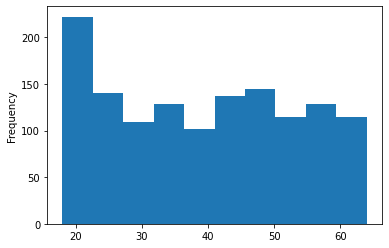

In [ ]:
X["age"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

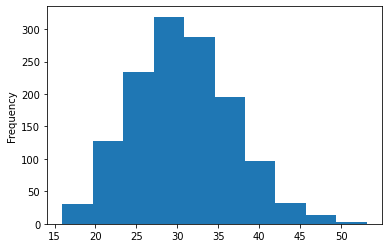

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#Read the insurance dataframe

insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare our data, we can borrow a few classes from Scikit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Create  column transformer

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #turn all values in these columns into 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

Create a model with data normalized

In [ ]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history = insurance_model_4.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 3s 6ms/step - loss: 13345.0889 - mae: 13345.0889
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 13340.4023 - mae: 13340.4023
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 13326.9482 - mae: 13326.9482
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 13295.0840 - mae: 13295.0840
Epoch 5/200
34/34 [==============================] - 0s 6ms/step - loss: 13233.6660 - mae: 13233.6660
Epoch 6/200
34/34 [==============================] - 0s 9ms/step - loss: 13131.1670 - mae: 13131.1670
Epoch 7/200
34/34 [==============================] - 0s 6ms/step - loss: 12976.7080 - mae: 12976.7080
Epoch 8/200
34/34 [==============================] - 0s 6ms/step - loss: 12759.7627 - mae: 12759.7627
Epoch 9/200
34/34 [==============================] - 0s 6ms/step - loss: 12469.8066 - mae: 12469.8057
Epoch 10/200
34/34 [==============================] - 0s 5ms/step - loss: 12098.32

Text(0.5, 0, 'epochs')

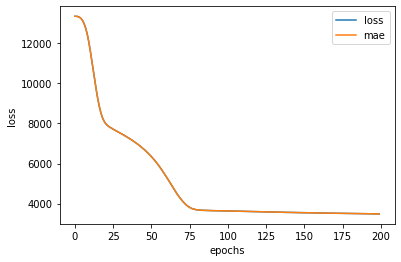

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3175.4536 - mae: 3175.4536


[3175.45361328125, 3175.45361328125]

## Neural network regression with TensorFlow Exercises

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#X = tf.random.Generator.from_seed(42)
#X = X.normal(shape=(1000, 1))

X = tf.cast(tf.range(0, 100, 0.1), dtype=tf.float32)

In [ ]:
X

<tf.Tensor: shape=(1000,), dtype=float32, numpy=
array([ 0.        ,  0.1       ,  0.2       ,  0.3       ,  0.4       ,
        0.5       ,  0.6       ,  0.70000005,  0.8000001 ,  0.9000001 ,
        1.0000001 ,  1.1000001 ,  1.2000002 ,  1.3000002 ,  1.4000002 ,
        1.5000002 ,  1.6000003 ,  1.7000003 ,  1.8000003 ,  1.9000003 ,
        2.0000002 ,  2.1000001 ,  2.2       ,  2.3       ,  2.3999999 ,
        2.4999998 ,  2.5999997 ,  2.6999996 ,  2.7999995 ,  2.8999994 ,
        2.9999993 ,  3.0999992 ,  3.199999  ,  3.299999  ,  3.399999  ,
        3.4999988 ,  3.5999987 ,  3.6999986 ,  3.7999985 ,  3.8999984 ,
        3.9999983 ,  4.0999985 ,  4.1999984 ,  4.2999983 ,  4.399998  ,
        4.499998  ,  4.599998  ,  4.699998  ,  4.799998  ,  4.8999977 ,
        4.9999976 ,  5.0999975 ,  5.1999974 ,  5.2999973 ,  5.399997  ,
        5.499997  ,  5.599997  ,  5.699997  ,  5.799997  ,  5.8999968 ,
        5.9999967 ,  6.0999966 ,  6.1999965 ,  6.2999964 ,  6.3999963 ,
        6.49999

In [ ]:
tf.size(X), X.shape, X.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=1000>, TensorShape([1000]), 1)

In [ ]:
y = tf.sin(X)
y, y.shape, tf.size(y)

(<tf.Tensor: shape=(1000,), dtype=float32, numpy=
 array([ 0.00000000e+00,  9.98334214e-02,  1.98669329e-01,  2.95520216e-01,
         3.89418334e-01,  4.79425550e-01,  5.64642489e-01,  6.44217730e-01,
         7.17356145e-01,  7.83326983e-01,  8.41471076e-01,  8.91207397e-01,
         9.32039142e-01,  9.63558257e-01,  9.85449791e-01,  9.97494996e-01,
         9.99573588e-01,  9.91664767e-01,  9.73847568e-01,  9.46299970e-01,
         9.09297347e-01,  8.63209307e-01,  8.08496356e-01,  7.45705247e-01,
         6.75463319e-01,  5.98472357e-01,  5.15501678e-01,  4.27380264e-01,
         3.34988654e-01,  2.39249930e-01,  1.41120717e-01,  4.15814742e-02,
        -5.83732389e-02, -1.57744706e-01, -2.55540043e-01, -3.50782126e-01,
        -4.42519277e-01, -5.29834926e-01, -6.11856699e-01, -6.87765002e-01,
        -7.56801367e-01, -8.18276227e-01, -8.71574998e-01, -9.16165233e-01,
        -9.51601505e-01, -9.77529705e-01, -9.93690789e-01, -9.99923229e-01,
        -9.96164799e-01, -9.82453048e-

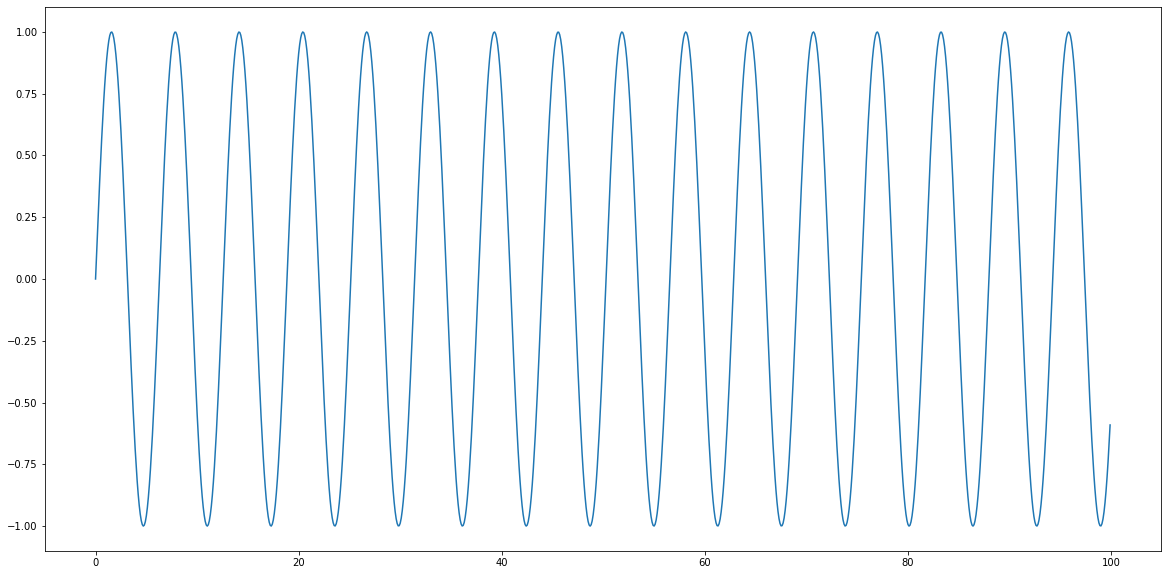

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(X, y)

In [ ]:
print(f'This is the starting shape of tensors. Shape of X: {X.shape}, and shape of y: {y.shape}',"\n")
X = tf.reshape(X, shape=(1000, -1))
y = tf.reshape(y, shape=(1000, -1))
print(f'This is the new shape of tensors. Shape of X: {X.shape}, and shape of y: {y.shape}', "\n")
X.dtype, y.dtype

This is the starting shape of tensors. Shape of X: (1000,), and shape of y: (1000,) 

This is the new shape of tensors. Shape of X: (1000, 1), and shape of y: (1000, 1) 



(tf.float32, tf.float32)

2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), test_size=0.2, shuffle=False)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1), (200, 1), (800, 1), (200, 1))

In [ ]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, activation='sigmoid'),
    tf.keras.layers.Dense(12, activation='sigmoid'),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mse"])

history = model_1.fit(X, y, epochs=30)

Epoch 1/30
32/32 [==============================] - 2s 4ms/step - loss: 0.9393 - mse: 0.9393
Epoch 2/30
32/32 [==============================] - 0s 3ms/step - loss: 0.5262 - mse: 0.5262
Epoch 3/30
32/32 [==============================] - 0s 4ms/step - loss: 0.5018 - mse: 0.5018
Epoch 4/30
32/32 [==============================] - 0s 4ms/step - loss: 0.5005 - mse: 0.5005
Epoch 5/30
32/32 [==============================] - 0s 3ms/step - loss: 0.5010 - mse: 0.5010
Epoch 6/30
32/32 [==============================] - 0s 3ms/step - loss: 0.5005 - mse: 0.5005
Epoch 7/30
32/32 [==============================] - 0s 3ms/step - loss: 0.5007 - mse: 0.5007
Epoch 8/30
32/32 [==============================] - 0s 3ms/step - loss: 0.4993 - mse: 0.4993
Epoch 9/30
32/32 [==============================] - 0s 4ms/step - loss: 0.4994 - mse: 0.4994
Epoch 10/30
32/32 [==============================] - 0s 5ms/step - loss: 0.4993 - mse: 0.4993
Epoch 11/30
32/32 [==============================] - 0s 4ms/step - lo

Text(0.5, 0, 'epochs')

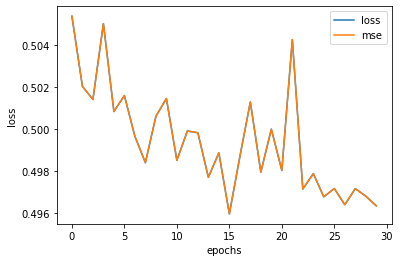

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
y_sin_predict = model_1.predict(X_test)

7/7 [==============================] - 0s 2ms/step


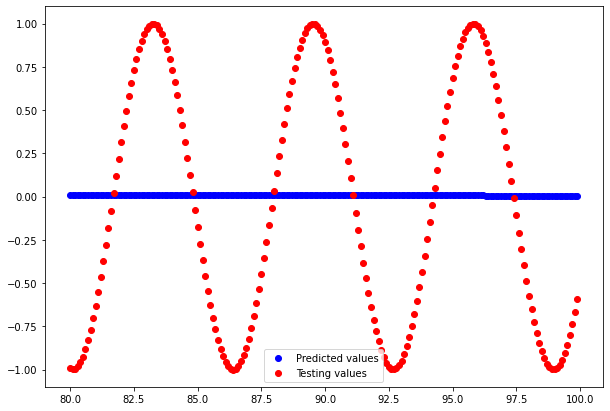

In [ ]:
plot_predict(X_test, y_test, y_sin_predict)

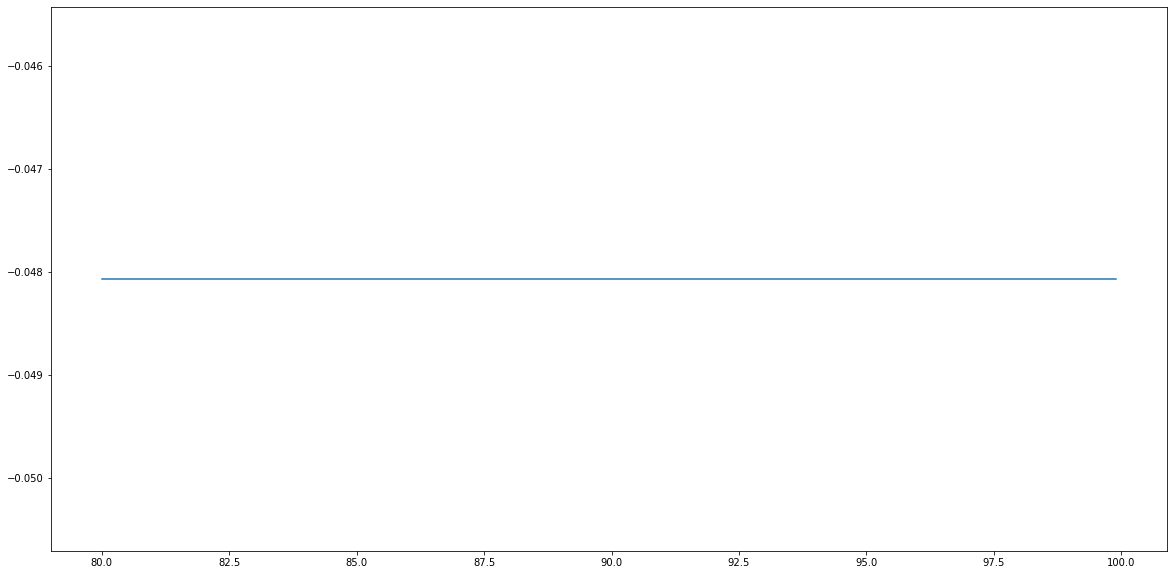

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(X_test, y_sin_predict)

3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
* Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = df.drop("charges", axis=1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

history = model.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 4ms/step - loss: 13344.1484 - mae: 13344.1484
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 13335.2510 - mae: 13335.2510
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13313.0889 - mae: 13313.0889
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13267.1885 - mae: 13267.1885
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 13186.8232 - mae: 13186.8232
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 13061.3613 - mae: 13061.3613
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12880.2734 - mae: 12880.2734
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 12632.7324 - mae: 12632.7324
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 12308.1250 - mae: 12308.1250
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 11902.91

In [ ]:
y_p = model.predict(X_test_normal)
y_p

9/9 [==============================] - 0s 3ms/step


array([[ 9399.043  ],
       [ 6097.839  ],
       [44168.008  ],
       [ 9349.388  ],
       [31887.316  ],
       [ 5792.662  ],
       [ 1154.42   ],
       [13576.823  ],
       [ 3625.0923 ],
       [10302.734  ],
       [35307.258  ],
       [ 7842.064  ],
       [ 4313.997  ],
       [40594.484  ],
       [43067.93   ],
       [40287.047  ],
       [10748.451  ],
       [40205.293  ],
       [ 8805.448  ],
       [38524.684  ],
       [ 4047.7793 ],
       [ 8102.3228 ],
       [  731.337  ],
       [ 3137.7595 ],
       [10982.429  ],
       [11381.08   ],
       [12423.554  ],
       [ 4915.5767 ],
       [10007.708  ],
       [  540.23334],
       [ 8382.23   ],
       [11831.353  ],
       [ 2022.2223 ],
       [ 5199.5923 ],
       [ 2998.2292 ],
       [ 8879.092  ],
       [ 1914.1418 ],
       [ 8001.0835 ],
       [41211.363  ],
       [36738.37   ],
       [ 3109.703  ],
       [ 2368.4062 ],
       [11789.385  ],
       [11611.314  ],
       [ 5663.0464 ],
       [11

In [ ]:
calculate_mae(y_test, y_p)
y_test.mean()

This is the mean absolute error of the model: 3168.203857421875


12968.317062869404

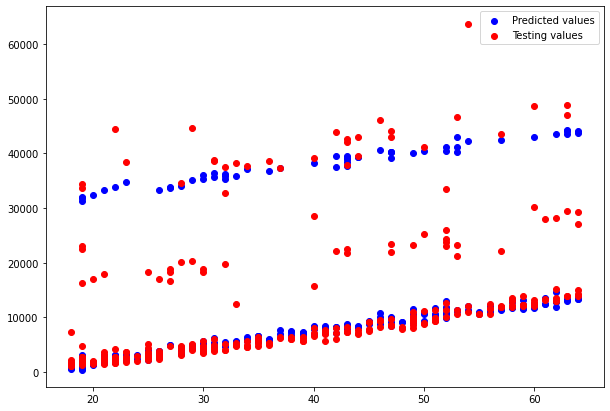

In [ ]:
plot_predict(X_test["age"], y_test, y_p)

4. Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

In [ ]:
train, test = tf.keras.datasets.boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
X_train, y_train = train[:]
X_test, y_test = test[:]

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [ ]:
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(13),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
13/13 [==============================] - 1s 5ms/step - loss: 42.9021 - mae: 42.9021
Epoch 2/30
13/13 [==============================] - 0s 3ms/step - loss: 27.3691 - mae: 27.3691
Epoch 3/30
13/13 [==============================] - 0s 3ms/step - loss: 20.0607 - mae: 20.0607
Epoch 4/30
13/13 [==============================] - 0s 6ms/step - loss: 14.3223 - mae: 14.3223
Epoch 5/30
13/13 [==============================] - 0s 3ms/step - loss: 11.6602 - mae: 11.6602
Epoch 6/30
13/13 [==============================] - 0s 3ms/step - loss: 10.6978 - mae: 10.6978
Epoch 7/30
13/13 [==============================] - 0s 4ms/step - loss: 10.1407 - mae: 10.1407
Epoch 8/30
13/13 [==============================] - 0s 3ms/step - loss: 9.7379 - mae: 9.7379
Epoch 9/30
13/13 [==============================] - 0s 3ms/step - loss: 9.1684 - mae: 9.1684
Epoch 10/30
13/13 [==============================] - 0s 3ms/step - loss: 8.9321 - mae: 8.9321
Epoch 11/30
13/13 [==============================] - 0s

<AxesSubplot:>

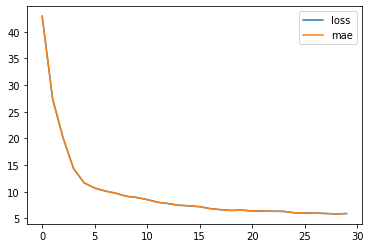

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
y_predict = model.predict(X_test)

4/4 [==============================] - 0s 5ms/step


In [ ]:
calculate_mae(y_test, y_predict)
y_test.mean()

This is the mean absolute error of the model: 6.25892972946167


23.07843137254902